## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
base_path = r'..\Dataset'

gen_path_normal = os.path.join(base_path, r'Generated\gen_normal.npy')
gen_path_patient = os.path.join(base_path, r'Generated\gen_patient.npy')

real_path_normal = os.path.join(base_path, r'Real\normal.npy')
real_path_patient = os.path.join(base_path, r'Real\patient.npy')

gen_path_normal,gen_path_patient,real_path_normal,real_path_patient,

('..\\Dataset\\Generated\\gen_normal.npy',
 '..\\Dataset\\Generated\\gen_patient.npy',
 '..\\Dataset\\Real\\normal.npy',
 '..\\Dataset\\Real\\patient.npy')

In [3]:
def higuchi_fd(sig, kmax):
    """
    Compute Higuchi Fractal Dimension of a time series.

    Parameters:
        sig : numpy array
            1-D real-valued time series signal.
        kmax : int
            Maximum delay value.

    Returns:
        float
            Higuchi Fractal Dimension.
    """
    n = len(sig)
    k_vals = np.arange(1, kmax + 1)
    lk = np.zeros(kmax)
    for k in k_vals:
        lm_sum = 0
        for m in range(k):
            num_windows = int(np.floor((n - m) / k))
            temp_sum = 0
            for i in range(num_windows):
                start_index = i * k + m
                end_index = start_index + k
                temp_sum += np.abs(sig[start_index:end_index].mean())
            lm_sum += (1 / (num_windows * k)) * temp_sum
        lk[k - 1] = (lm_sum * (n / k)**2) / ((n - 1) / k)
    return np.log(lk).sum() / np.log(np.divide(n, k_vals)).sum()

In [4]:
# Function to compute Shannon Entropy
def shannonentropy(sig, base=np.exp(1)):
    hist, _ = np.histogram(sig, bins='auto', density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log(hist) / np.log(base))
    return entropy

In [5]:
# Function to compute Katz Fractal Dimension
def katz_fd(sig):
    d = np.abs(np.diff(sig)).sum()
    N = len(sig) - 1
    L = np.hypot(np.diff(sig), 1).sum()
    katz_dim = np.log10(N) / (np.log10(d / L) + np.log10(N))
    return katz_dim

In [6]:
from tqdm import tqdm

def create_dataset(file_path: str, dataset: list, func, classification:int, **kwargs):
    control = np.load(file_path)
    for signal in tqdm(control):
        partial_signal = []
        for channel in signal:
            partial_signal.append(func(channel, **kwargs))
        partial_signal.append(classification)
        partial_signal
        dataset.append(partial_signal)
    return dataset

In [7]:
#For classification

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print(p)
  print("Training Accuracy: " + str(accuracy_score(train_preds, train_labels)))
  print("Training Precision: " + str(precision_score(train_preds, train_labels)))
  print("Training Recall: " + str(recall_score(train_preds, train_labels)))
  print("Training F1: " + str(f1_score(train_preds, train_labels)))

  print("Test Accuracy: " + str(accuracy_score(test_preds, test_labels)))
  print("Test Precision: " + str(precision_score(test_preds, test_labels)))
  print("Test Recall: " + str(recall_score(test_preds, test_labels)))
  print("Test F1: " + str(f1_score(test_preds, test_labels)))

## Higuchi

***To use machine learning models with the actual data***

In [8]:
use_existing = False

In [9]:



if not use_existing:
    dataset_hfd = []
    create_dataset(real_path_patient, dataset_hfd, higuchi_fd, 1, kmax=6)
    create_dataset(real_path_normal, dataset_hfd, higuchi_fd, 0, kmax=6)

    dataset_hfd = np.asarray(dataset_hfd)
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])
    # np.save(r'training_data_MLProject\higuchi_real_only',dataset_hfd)
else:
    dataset_hfd = np.load(r'training_data_MLProject\higuchi_real_only.npy')
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])


100%|██████████| 7825/7825 [16:35<00:00,  7.86it/s]

Dataset shape: (15725, 20)
[0.56109246 0.47043866 0.49645904 0.5118995  0.45158586 0.54602093
 0.41266792 0.40146916 0.66436362 0.51924498 0.49085603 0.52458308
 0.46382054 0.57529769 0.38712641 0.4463832  0.4831878  0.5222854
 0.49328266 1.        ]


**Generated Data Higuchi**

In [10]:
use_existing = False

In [11]:
generated_hfd = []
create_dataset(gen_path_patient, generated_hfd, higuchi_fd, 1, kmax=6)
create_dataset(gen_path_normal, generated_hfd, higuchi_fd, 0, kmax=6)


generated_hfd = np.asarray(generated_hfd)
print(generated_hfd[0])

100%|██████████| 2000/2000 [06:21<00:00,  5.25it/s]


[0.55018909 0.55649181 0.56454548 0.56468998 0.56397814 0.49654457
 0.47195979 0.50940249 0.52097945 0.54146491 0.55286749 0.57471048
 0.58572939 0.51494778 0.51924951 0.52936446 0.56857746 0.57373839
 0.58429809 1.        ]


FileNotFoundError: [Errno 2] No such file or directory: 'training_data_MLProject\\higuchi_gen_only.npy'

In [12]:
X = dataset_hfd[:, :-1]
y = dataset_hfd[:, -1]

X_test_hfd, y_test_hfd = X, y

In [13]:
X = generated_hfd[:, :-1]
y = generated_hfd[:, -1]

X_train_hfd, y_train_hfd = X, y

In [14]:
X_train_hfd.shape, X_test_hfd.shape, y_train_hfd.shape, y_test_hfd.shape

((4000, 19), (15725, 19), (4000,), (15725,))

### Logistic Regression

In [15]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
# lr_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(lr_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

LogisticRegression()
Training Accuracy: 0.93825
Training Precision: 0.894
Training Recall: 0.9808008776741635
Training F1: 0.9353910541459587
Test Accuracy: 0.9804133545310015
Test Precision: 0.9622784810126582
Test Recall: 0.9986862848134525
Test F1: 0.98014440433213


### Random Forest

In [16]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
# rf_classifier.fit(X_train_hfd, y_train_hfd)

fit_and_print(rf_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.9375
Training Precision: 0.887
Training Recall: 0.9866518353726362
Training F1: 0.9341758820431806
Test Accuracy: 0.9834658187599364
Test Precision: 0.9674683544303797
Test Recall: 0.9996076379806434
Test F1: 0.9832754406278142


In [17]:
rf_classifier.feature_importances_

array([0.01367318, 0.00529052, 0.0241041 , 0.01182922, 0.02452607,
       0.0934955 , 0.33235015, 0.06323637, 0.0054684 , 0.01165886,
       0.0228336 , 0.01983408, 0.02001585, 0.12910156, 0.18430972,
       0.02627342, 0.00272041, 0.00188166, 0.00739732])

### Decision Tree

In [18]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(dt_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.9496343402225755
Test Precision: 0.9583544303797469
Test Recall: 0.942369927806821
Test F1: 0.9502949667377933


### Naive Bayes

In [19]:
# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
# nb_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(nb_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

GaussianNB()
Training Accuracy: 0.77075
Training Precision: 0.6855
Training Recall: 0.8264014466546112
Training F1: 0.7493850778901339
Test Accuracy: 0.8897297297297297
Test Precision: 0.8317721518987342
Test Recall: 0.9419438073394495
Test F1: 0.8834364076364614


### SVM

In [20]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(poly_kernel_svm_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.984
Training Precision: 0.976
Training Recall: 0.991869918699187
Training F1: 0.9838709677419355
Test Accuracy: 0.9847376788553259
Test Precision: 0.9753164556962025
Test Recall: 0.9941935483870967
Test F1: 0.984664536741214


***SVM - using Regularization***

In [21]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.98125
Training Precision: 0.9695
Training Recall: 0.992831541218638
Training F1: 0.9810270680495826
Test Accuracy: 0.9851192368839428
Test Precision: 0.9750632911392405
Test Recall: 0.9952196382428941
Test F1: 0.9850383631713555


In [22]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized2, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.983
Training Precision: 0.974
Training Recall: 0.9918533604887984
Training F1: 0.9828456104944501
Test Accuracy: 0.9847376788553259
Test Precision: 0.9749367088607594
Test Recall: 0.9945764462809917
Test F1: 0.9846586550754283


### K Nearest Neighbors

In [23]:
knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(knn_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.97025
Training Precision: 0.942
Training Recall: 0.9984101748807631
Training F1: 0.969385129920247
Test Accuracy: 0.9737360890302067
Test Precision: 0.9564556962025317
Test Recall: 0.9909508196721312
Test F1: 0.9733977455716586


### Ensemble

In [24]:
#should update all the models here
voting_clf = VotingClassifier(
    estimators=[('lr', lr_classifier),('rf', rf_classifier), ('dt',dt_classifier), ('nb', nb_classifier), ('svm', poly_kernel_svm_clf), ('svc', poly_kernel_svm_clf_regularized), ('svc2', poly_kernel_svm_clf_regularized2), ('knn', knn_clf)],
    voting='soft')

fit_and_print(voting_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [25]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = lr_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = dt_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = nb_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)



# Get predicted probabilities for the positive class
svm_probs = poly_kernel_svm_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = poly_kernel_svm_clf_regularized.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = poly_kernel_svm_clf_regularized2.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = knn_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)



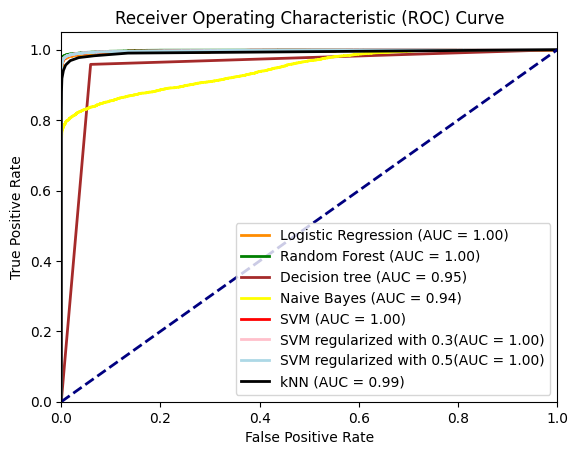

In [26]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with 0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with 0.5(AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ***Entropy***

**Real Data**

In [27]:

dataset_ent = []
create_dataset(real_path_patient, dataset_ent, shannonentropy, 1)
create_dataset(real_path_normal, dataset_ent, shannonentropy, 0)


dataset_ent = np.asarray(dataset_ent)
print(dataset_ent[0], '\n', dataset_ent.shape)
# np.save(r'training_data_MLProject\ent_real_only.npy', dataset_ent)



100%|██████████| 7825/7825 [00:12<00:00, 613.41it/s]


[-14.31575274 -39.87786793 -27.93728608 -26.71651069 -44.32633529
 -17.61673755 -67.81040815 -68.17471471  -2.31617073 -24.20556162
 -31.36581279 -21.91392872 -38.48848634 -12.61496659 -88.85958763
 -47.03138486 -32.2817704  -20.70437082 -34.62233448   1.        ] 
 (15725, 20)


**Generated Data**

In [28]:
use_existing = False

In [29]:

generated_ent = []
create_dataset(gen_path_patient, generated_ent, shannonentropy, 1)
create_dataset(gen_path_normal, generated_ent, shannonentropy, 0)


generated_ent = np.asarray(generated_ent)
print(generated_ent[0], '\n', generated_ent.shape)




100%|██████████| 2000/2000 [00:03<00:00, 518.73it/s]

[-16.70402784 -18.21506052 -13.02901719 -13.22721518 -13.17082272
 -29.69304716 -37.79999854 -25.99471445 -26.95971969 -17.49621996
 -15.58153144 -11.96431571  -9.57692814 -25.31091489 -22.8861599
 -19.69316074 -12.75741055 -11.89232164  -9.94482604   1.        ] 
 (4000, 20)


In [30]:
# # Extract features (X) and output variable (y)
# X1 = dataset_ent[:, :-1]
# y1 = dataset_ent[:, -1]

# # Split the data into training and testing sets
# X_train_ent, X_test_ent = X1[train_indices], X1[test_indices]
# y_train_ent, y_test_ent = y1[train_indices], y1[test_indices]
X_train_ent, y_train_ent = generated_ent[:, :-1], generated_ent[:, -1]
X_test_ent, y_test_ent = dataset_ent[:, :-1], dataset_ent[:, -1]

In [31]:
X_train_ent.shape, y_train_ent.shape, X_test_ent.shape, y_test_ent.shape

((4000, 19), (4000,), (15725, 19), (15725,))

### Random Forest

In [32]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.864
Training Precision: 0.9105
Training Recall: 0.833028362305581
Training F1: 0.870043000477783
Test Accuracy: 0.7275675675675676
Test Precision: 0.7491139240506329
Test Recall: 0.7199513381995134
Test F1: 0.7342431761786601


**Feature Importances**

In [33]:
ent_rf_classifier.feature_importances_

array([0.0219166 , 0.03068617, 0.06643778, 0.02370788, 0.05913551,
       0.01549221, 0.07603933, 0.00994237, 0.11748021, 0.01264837,
       0.01744966, 0.09136992, 0.11573972, 0.02597187, 0.09495722,
       0.09922894, 0.00738604, 0.08485175, 0.02955841])

### Feature Selection

In [34]:
print(features_importance := ent_rf_classifier.feature_importances_)

# Threshold
threshold = 0.0

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

[0.0219166  0.03068617 0.06643778 0.02370788 0.05913551 0.01549221
 0.07603933 0.00994237 0.11748021 0.01264837 0.01744966 0.09136992
 0.11573972 0.02597187 0.09495722 0.09922894 0.00738604 0.08485175
 0.02955841]


In [35]:
print(indexes)
# X_train_ent, X_test_ent = X_train_ent[:, indexes], X_test_ent[:, indexes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Random Forest Classifier

In [36]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.871
Training Precision: 0.9125
Training Recall: 0.8425669436749769
Training F1: 0.8761401824291887
Test Accuracy: 0.7273131955484897
Test Precision: 0.7449367088607595
Test Recall: 0.7213777886736945
Test F1: 0.7329679910325072


### Logistic Regression

In [37]:
# Initialize the Logistic Regression Classifier
ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
# ent_lr_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_lr_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

LogisticRegression()
Training Accuracy: 0.8485
Training Precision: 0.843
Training Recall: 0.8523761375126391
Training F1: 0.8476621417797888
Test Accuracy: 0.7311287758346582
Test Precision: 0.7165822784810126
Test Recall: 0.74
Test F1: 0.7281028938906753


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [38]:
# Initialize the Decision Tree Classifier
ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# ent_dt_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_dt_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6890302066772656
Test Precision: 0.6894936708860759
Test Recall: 0.6908929477422628
Test F1: 0.6901926001013685


### Naive Bayes

In [39]:
# Initialize the Naïve Bayes Classifier
ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
# ent_nb_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_nb_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

GaussianNB()
Training Accuracy: 0.59925
Training Precision: 0.839
Training Recall: 0.5670834741466712
Training F1: 0.6767493446259326
Test Accuracy: 0.5976470588235294
Test Precision: 0.8060759493670886
Test Recall: 0.5704559706172176
Test F1: 0.6681005088391124


### SVM

In [40]:
ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(ent_poly_kernel_svm_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.893
Training Precision: 0.883
Training Recall: 0.9010204081632653
Training F1: 0.8919191919191919
Test Accuracy: 0.7414944356120827
Test Precision: 0.7532911392405063
Test Recall: 0.7376967893888682
Test F1: 0.7454124131020229


In [41]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.883
Training Precision: 0.873
Training Recall: 0.8908163265306123
Training F1: 0.8818181818181818
Test Accuracy: 0.7334181240063593
Test Precision: 0.7362025316455696
Test Recall: 0.7339727410398789
Test F1: 0.7350859453993933


In [42]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized2, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.88925
Training Precision: 0.8795
Training Recall: 0.8969913309535951
Training F1: 0.8881595556677606
Test Accuracy: 0.7378060413354531
Test Precision: 0.7440506329113924
Test Recall: 0.7366837949617746
Test F1: 0.7403488884690471


### K Nearest Neighbors

In [43]:
ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=7))
    ])

fit_and_print(ent_knn_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=7))])
Training Accuracy: 0.91325
Training Precision: 0.909
Training Recall: 0.9167927382753404
Training F1: 0.9128797388902837
Test Accuracy: 0.7296661367249603
Test Precision: 0.769873417721519
Test Recall: 0.7142689371697005
Test F1: 0.7410295461468169


In [44]:
#should add all the models reference here
ent_voting_clf = VotingClassifier(
    estimators=[('lr', ent_lr_classifier),('rf', ent_rf_classifier), ('dt',ent_dt_classifier), ('nb', ent_nb_classifier),('svm', ent_poly_kernel_svm_clf), ('svc', ent_poly_kernel_svm_clf_regularized), ('svc2', ent_poly_kernel_svm_clf_regularized2), ('knn', ent_knn_clf)],
    voting='soft')

fit_and_print(ent_voting_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [45]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
ent_lr_probs = ent_lr_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_lr, ent_tpr_lr, _ = roc_curve(y_test_ent, ent_lr_probs)

# Calculate AUC
ent_roc_auc_lr = auc(ent_fpr_lr, ent_tpr_lr)


# Get predicted probabilities for the positive class
ent_rf_probs = ent_rf_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_rf, ent_tpr_rf, _ = roc_curve(y_test_ent, ent_rf_probs)

# Calculate AUC
ent_roc_auc_rf = auc(ent_fpr_rf, ent_tpr_rf)


# Get predicted probabilities for the positive class
ent_dt_probs = ent_dt_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_dt, ent_tpr_dt, _ = roc_curve(y_test_ent, ent_dt_probs)

# Calculate AUC
ent_roc_auc_dt = auc(ent_fpr_dt, ent_tpr_dt)


# Get predicted probabilities for the positive class
ent_nb_probs = ent_nb_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_nb, ent_tpr_nb, _ = roc_curve(y_test_ent, ent_nb_probs)

# Calculate AUC
ent_roc_auc_nb = auc(ent_fpr_nb, ent_tpr_nb)



# Get predicted probabilities for the positive class
ent_svm_probs = ent_poly_kernel_svm_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm, ent_tpr_svm, _ = roc_curve(y_test_ent, ent_svm_probs)

# Calculate AUC
ent_roc_auc_svm = auc(ent_fpr_svm, ent_tpr_svm)




# Get predicted probabilities for the positive class
ent_svm_probs2 = ent_poly_kernel_svm_clf_regularized2.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm2, ent_tpr_svm2, _ = roc_curve(y_test_ent, ent_svm_probs2)

# Calculate AUC
ent_roc_auc_svm2 = auc(ent_fpr_svm2, ent_tpr_svm2)




# Get predicted probabilities for the positive class
ent_svm_probs3 = ent_poly_kernel_svm_clf_regularized.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm3, ent_tpr_svm3, _ = roc_curve(y_test_ent, ent_svm_probs3)

# Calculate AUC
ent_roc_auc_svm3 = auc(ent_fpr_svm3, ent_tpr_svm3)



# Get predicted probabilities for the positive class
ent_knn_probs = ent_knn_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_knn, ent_tpr_knn, _ = roc_curve(y_test_ent, ent_knn_probs)

# Calculate AUC
ent_roc_auc_knn = auc(ent_fpr_knn, ent_tpr_knn)


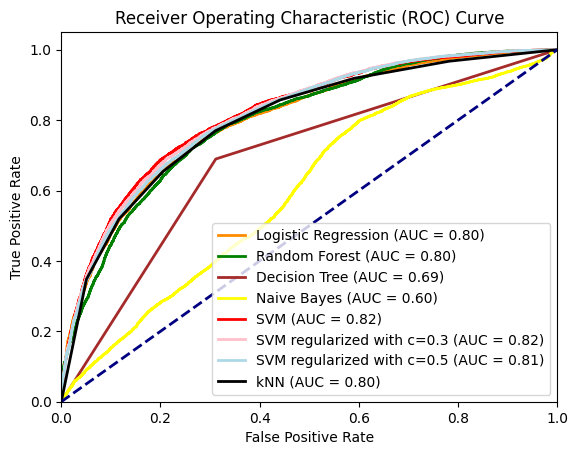

In [46]:
# Plot ROC curve
plt.figure()
plt.plot(ent_fpr_lr, ent_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % ent_roc_auc_lr)
plt.plot(ent_fpr_rf, ent_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % ent_roc_auc_rf)
plt.plot(ent_fpr_dt, ent_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % ent_roc_auc_dt)
plt.plot(ent_fpr_nb, ent_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % ent_roc_auc_nb)
plt.plot(ent_fpr_svm, ent_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % ent_roc_auc_svm)
plt.plot(ent_fpr_svm2, ent_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % ent_roc_auc_svm2)
plt.plot(ent_fpr_svm3, ent_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % ent_roc_auc_svm3)
plt.plot(ent_fpr_knn, ent_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % ent_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Kats Fractal Dimension

**Real Dataset**

In [49]:
use_existing = False

In [50]:
dataset_kfd = []
create_dataset(real_path_patient, dataset_kfd, katz_fd, 1)
create_dataset(real_path_normal, dataset_kfd, katz_fd, 0)


dataset_kfd = np.asarray(dataset_kfd)
print(dataset_kfd[0], '\n', dataset_kfd.shape) 

100%|██████████| 7825/7825 [00:01<00:00, 5640.26it/s]

[2.85022047 3.00102131 2.82390759 2.72938072 2.74756512 2.86005195
 3.43375025 3.73451904 2.8223007  3.18500554 2.85346078 2.56504404
 2.53214135 3.33004551 3.74027651 2.80904905 2.87429357 2.72550023
 2.9363883  1.        ] 
 (15725, 20)


**Generated Data**

In [51]:
generated_kfd = []
create_dataset(gen_path_patient, generated_kfd, katz_fd, 1)
create_dataset(gen_path_normal, generated_kfd, katz_fd, 0)


generated_kfd = np.asarray(generated_kfd)
print(generated_kfd[0], '\n', generated_kfd.shape)

100%|██████████| 2000/2000 [00:00<00:00, 6320.53it/s]

[2.51621944 2.3829351  2.36597659 2.34815462 2.294363   2.58261191
 2.79595148 2.54164074 2.45650951 2.42251009 2.37575836 2.32510515
 2.19451649 2.63185562 2.64780572 2.45093733 2.38082276 2.33946835
 2.33044892 1.        ] 
 (4000, 20)


In [52]:
print("Dataset: ", dataset_kfd.min(), dataset_kfd.max(), dataset_kfd.mean(), dataset_kfd.std(), 
      "\nGenerated:", generated_kfd.min(), generated_kfd.max(), generated_kfd.mean(), generated_kfd.std())

Dataset:  0.0 5.280965884344175 2.5782149365692892 0.6604553503841006 
Generated: 0.0 8.239738525747079 2.6462095338884137 0.7153894882725159


In [53]:
X_train_kfd, y_train_kfd = generated_kfd[:, :-1], generated_kfd[:, -1]
X_test_kfd, y_test_kfd = dataset_kfd[:, :-1], dataset_kfd[:, -1]

In [54]:
# X2 = dataset_kfd[:, :-1]
# y2 = dataset_kfd[:, -1]

# num_samples = len(y2)
# train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# # Randomly select indices for training and testing
# indices = np.arange(num_samples)
# np.random.shuffle(indices)

# train_indices = indices[:train_size]
# test_indices = indices[train_size:]
# # Extract features (X) and output variable (y)

# # Split the data into training and testing sets
# X_train_kfd, X_test_kfd = X2[train_indices], X2[test_indices]
# y_train_kfd, y_test_kfd = y2[train_indices], y2[test_indices]


### Random Forest 

In [55]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.80125
Training Precision: 0.9425
Training Recall: 0.7348927875243665
Training F1: 0.8258488499452354
Test Accuracy: 0.7410492845786963
Test Precision: 0.7234177215189873
Test Recall: 0.7517758484609314
Test F1: 0.7373242162301639


### Feature Selection

In [56]:
print(features_importance := kfd_rf_classifier.feature_importances_)

[0.02736204 0.0190284  0.04620227 0.03084165 0.04401383 0.03184036
 0.07633327 0.04082156 0.06831324 0.01538325 0.06931895 0.17444549
 0.10213438 0.00952796 0.04555565 0.04406418 0.01259921 0.12277385
 0.01944045]


In [57]:
# values = [0.05, 0.2, 0.1, 0.15, -0.3, 0.5, 0.05]

# Threshold
threshold = 0.1

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

In [58]:
indexes

[11, 12, 17]

In [59]:
# X_train_kfd, X_test_kfd = X_train_kfd[:, indexes], X_test_kfd[:, indexes]

### Random Forest Classifier

In [60]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.7975
Training Precision: 0.947
Training Recall: 0.729022324865281
Training F1: 0.823836450630709
Test Accuracy: 0.7411128775834658
Test Precision: 0.729493670886076
Test Recall: 0.7487332727036508
Test F1: 0.7389882669744181


### Logistic Regression

In [61]:
# Initialize the Logistic Regression Classifier
kfd_lr_classifier = LogisticRegression()

# Train the classifier on the  training data
kfd_lr_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_lr_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

LogisticRegression()
Training Accuracy: 0.90225
Training Precision: 0.9005
Training Recall: 0.9036628198695434
Training F1: 0.9020786376158277
Test Accuracy: 0.6941176470588235
Test Precision: 0.63
Test Recall: 0.7250874125874126
Test F1: 0.6742075318341912


### Decision Tree

In [62]:
# Initialize the Decision Tree Classifier
kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# kfd_dt_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_dt_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6047694753577106
Test Precision: 0.4910126582278481
Test Recall: 0.6387287996048082
Test F1: 0.5552136262792529


### Naive Bayes

In [63]:
# Initialize the Naïve Bayes Classifier
kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
# kfd_nb_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_nb_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

GaussianNB()
Training Accuracy: 0.5885
Training Precision: 0.828
Training Recall: 0.5598377281947262
Training F1: 0.6680112948769665
Test Accuracy: 0.6316057233704293
Test Precision: 0.8612658227848101
Test Recall: 0.591600730371272
Test F1: 0.7014071439616515


### SVM

In [64]:
kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(kfd_poly_kernel_svm_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.932
Training Precision: 0.925
Training Recall: 0.9381338742393509
Training F1: 0.9315206445115811
Test Accuracy: 0.7405405405405405
Test Precision: 0.6465822784810127
Test Recall: 0.7986241400875547
Test F1: 0.7146054840514829


In [65]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.926
Training Precision: 0.9215
Training Recall: 0.9298688193743693
Training F1: 0.9256654947262682
Test Accuracy: 0.7283306836248012
Test Precision: 0.6465822784810127
Test Recall: 0.7753491196114147
Test F1: 0.7051352843732744


In [66]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized2, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.92725
Training Precision: 0.9205
Training Recall: 0.9330968068930563
Training F1: 0.9267556003020387
Test Accuracy: 0.7307472178060413
Test Precision: 0.6367088607594936
Test Recall: 0.7866750078198311
Test F1: 0.7037918007555618


### K Nearest Neighbors

In [67]:
kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(kfd_knn_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.9415
Training Precision: 0.974
Training Recall: 0.9145539906103286
Training F1: 0.9433414043583536
Test Accuracy: 0.6782829888712242
Test Precision: 0.6322784810126583
Test Recall: 0.6986991187578683
Test F1: 0.6638314838195228


### Ensemble

In [68]:
# fill all the models here
kfd_voting_clf = VotingClassifier(
    estimators=[('lr', kfd_lr_classifier),('rf', kfd_rf_classifier), ('dt',kfd_dt_classifier), ('nb', kfd_nb_classifier),('svm', kfd_poly_kernel_svm_clf), ('svc', kfd_poly_kernel_svm_clf_regularized), ('svc2', kfd_poly_kernel_svm_clf_regularized2), ('knn', kfd_knn_clf)],
    voting='soft')

fit_and_print(kfd_voting_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [69]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
kfd_lr_probs = kfd_lr_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_lr, kfd_tpr_lr, _ = roc_curve(y_test_kfd, kfd_lr_probs)

# Calculate AUC
kfd_roc_auc_lr = auc(kfd_fpr_lr, kfd_tpr_lr)



# Get predicted probabilities for the positive class
kfd_rf_probs = kfd_rf_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_rf, kfd_tpr_rf, _ = roc_curve(y_test_kfd, kfd_rf_probs)

# Calculate AUC
kfd_roc_auc_rf = auc(kfd_fpr_rf, kfd_tpr_rf)


# Get predicted probabilities for the positive class
kfd_dt_probs = kfd_dt_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_dt, kfd_tpr_dt, _ = roc_curve(y_test_kfd, kfd_dt_probs)

# Calculate AUC
kfd_roc_auc_dt = auc(kfd_fpr_dt, kfd_tpr_dt)


# Get predicted probabilities for the positive class
kfd_nb_probs = kfd_nb_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_nb, kfd_tpr_nb, _ = roc_curve(y_test_kfd, kfd_nb_probs)

# Calculate AUC
kfd_roc_auc_nb = auc(kfd_fpr_nb, kfd_tpr_nb)



# Get predicted probabilities for the positive class
kfd_svm_probs = kfd_poly_kernel_svm_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm, kfd_tpr_svm, _ = roc_curve(y_test_kfd, kfd_svm_probs)

# Calculate AUC
kfd_roc_auc_svm = auc(kfd_fpr_svm, kfd_tpr_svm)




# Get predicted probabilities for the positive class
kfd_svm_probs2 = kfd_poly_kernel_svm_clf_regularized.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm2, kfd_tpr_svm2, _ = roc_curve(y_test_kfd, kfd_svm_probs2)

# Calculate AUC
kfd_roc_auc_svm2 = auc(kfd_fpr_svm2, kfd_tpr_svm2)




# Get predicted probabilities for the positive class
kfd_svm_probs3 = kfd_poly_kernel_svm_clf_regularized2.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm3, kfd_tpr_svm3, _ = roc_curve(y_test_kfd, kfd_svm_probs3)

# Calculate AUC
kfd_roc_auc_svm3 = auc(kfd_fpr_svm3, kfd_tpr_svm3)



# Get predicted probabilities for the positive class
kfd_knn_probs = kfd_knn_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_knn, kfd_tpr_knn, _ = roc_curve(y_test_kfd, kfd_knn_probs)

# Calculate AUC
kfd_roc_auc_knn = auc(kfd_fpr_knn, kfd_tpr_knn)


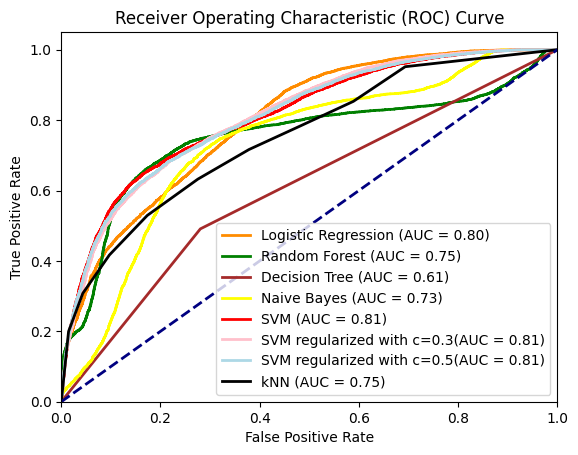

In [70]:
# Plot ROC curve
plt.figure()
plt.plot(kfd_fpr_lr, kfd_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % kfd_roc_auc_lr)
plt.plot(kfd_fpr_rf, kfd_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % kfd_roc_auc_rf)
plt.plot(kfd_fpr_dt, kfd_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % kfd_roc_auc_dt)
plt.plot(kfd_fpr_nb, kfd_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % kfd_roc_auc_nb)
plt.plot(kfd_fpr_svm, kfd_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % kfd_roc_auc_svm)
plt.plot(kfd_fpr_svm2, kfd_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % kfd_roc_auc_svm2)
plt.plot(kfd_fpr_svm3, kfd_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5(AUC = %0.2f)' % kfd_roc_auc_svm3)
plt.plot(kfd_fpr_knn, kfd_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % kfd_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# EEGNet

In [71]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split

In [72]:
batch_size = 32

In [73]:
training_data_control_np = np.load(gen_path_normal)
training_data_patient_np = np.load(gen_path_patient)

labels_control = np.zeros(training_data_control_np.shape[0])  # Label for controls is 0
labels_patient = np.ones(training_data_patient_np.shape[0])   # Label for patients is 1


training_data_np = np.concatenate((training_data_control_np,training_data_patient_np), axis=0)
labels_np = np.concatenate((labels_control, labels_patient), axis=0)

data_tensor = torch.Tensor(training_data_np)
labels_tensor = torch.LongTensor(labels_np)  # Use LongTensor for labels

# Since the discriminator expects flat input, flatten the data if necessary
data_tensor = data_tensor.view(data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, labels_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [74]:
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)

val_labels_control = np.zeros(real_data_control.shape[0])  # Label for controls is 0
val_labels_patient = np.ones(real_data_patient.shape[0])   # Label for patients is 1

validation_data_np = np.concatenate((real_data_control,real_data_patient), axis=0)
val_labels_np = np.concatenate((val_labels_control, val_labels_patient), axis=0)

validation_data_tensor = torch.Tensor(validation_data_np)
val_tensor = torch.LongTensor(val_labels_np) #, dtype=torch.float32) #.dtype(torch.float) 

# Since the discriminator expects flat input, flatten the data if necessary
validation_data_tensor = validation_data_tensor.view(validation_data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
validation_dataset = TensorDataset(validation_data_tensor, val_tensor)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)


In [75]:
validation_data_np.shape,val_labels_np.shape

((15725, 19, 500), (15725,))

In [76]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from modules.EEGNET import EEGNetClassifier

test_validity = False

if not test_validity:
    model = EEGNetClassifier().cuda()
else:
    class SimpleNet(nn.Module):
        def __init__(self, input_channels=1, num_classes=1):
            super(SimpleNet, self).__init__()
            self.conv1 = nn.Conv2d(input_channels, 1, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU()
            self.fc = nn.Linear(9500, num_classes)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            # Input x should have shape: (batch_size, input_channels, sequence_length)
            x = self.conv1(x)
            x = self.relu(x)
            # Flatten before fully connected layer
            x = x.view(x.size(0), -1)
            x = self.fc(x)
            x = self.sigmoid(x)
            return x
    model = SimpleNet().cuda()

In [77]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 25 

In [78]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    model.train()
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())

        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")
    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Val Loss: {sum(val_losses)/len(val_losses)} Val Accuracy: {val_accuracy}\033[0m")
            

Epoch 0 Loss: 0.007621513679623604 : 100%|██████████| 125/125 [00:01<00:00, 120.36it/s]


Epoch 0 Training Loss: 0.10971662355214358 Val Loss: 0.0002268850963239272 Val Accuracy: 1.0


Epoch 1 Loss: 0.009931341744959354 : 100%|██████████| 125/125 [00:00<00:00, 314.80it/s]


Epoch 1 Training Loss: 0.003961677751038223 Val Loss: 3.8990936053874695e-05 Val Accuracy: 1.0


Epoch 2 Loss: 0.0005879834061488509 : 100%|██████████| 125/125 [00:00<00:00, 301.27it/s] 


Epoch 2 Training Loss: 0.0024602771534118803 Val Loss: 1.170776753047992e-05 Val Accuracy: 1.0


Epoch 3 Loss: 0.005340876057744026 : 100%|██████████| 125/125 [00:00<00:00, 307.79it/s] 


Epoch 3 Training Loss: 0.0017322408756008372 Val Loss: 8.322734006737587e-06 Val Accuracy: 1.0


Epoch 4 Loss: 0.0005249956739135087 : 100%|██████████| 125/125 [00:00<00:00, 314.49it/s]


Epoch 4 Training Loss: 0.0009506310797587502 Val Loss: 2.4313334836671777e-06 Val Accuracy: 1.0


Epoch 5 Loss: 0.00011000356607837602 : 100%|██████████| 125/125 [00:00<00:00, 305.73it/s]


Epoch 5 Training Loss: 0.0006884557131561451 Val Loss: 1.3973963476363739e-06 Val Accuracy: 1.0


Epoch 6 Loss: 6.121917976997793e-05 : 100%|██████████| 125/125 [00:00<00:00, 329.02it/s] 


Epoch 6 Training Loss: 0.0006952004506456433 Val Loss: 7.557448764572428e-07 Val Accuracy: 1.0


Epoch 7 Loss: 0.00015012921357993037 : 100%|██████████| 125/125 [00:00<00:00, 308.65it/s]


Epoch 7 Training Loss: 0.000406766359708854 Val Loss: 5.139151161933904e-07 Val Accuracy: 1.0


Epoch 8 Loss: 5.083987707621418e-05 : 100%|██████████| 125/125 [00:00<00:00, 313.64it/s]


Epoch 8 Training Loss: 0.0004595680954225827 Val Loss: 3.6233210113918375e-07 Val Accuracy: 1.0


Epoch 9 Loss: 0.00035167060559615493 : 100%|██████████| 125/125 [00:00<00:00, 324.15it/s]


Epoch 9 Training Loss: 0.00020261027944798115 Val Loss: 2.7197193077409105e-07 Val Accuracy: 1.0


Epoch 10 Loss: 9.154113649856299e-05 : 100%|██████████| 125/125 [00:00<00:00, 320.96it/s]


Epoch 10 Training Loss: 0.0001922046622748894 Val Loss: 3.4514758124358174e-07 Val Accuracy: 1.0


Epoch 11 Loss: 2.9365764930844307e-05 : 100%|██████████| 125/125 [00:00<00:00, 300.66it/s]


Epoch 11 Training Loss: 0.0002900873728794977 Val Loss: 1.603052998325668e-07 Val Accuracy: 1.0


Epoch 12 Loss: 3.877851122524589e-05 : 100%|██████████| 125/125 [00:00<00:00, 298.94it/s] 


Epoch 12 Training Loss: 0.0006246386849361443 Val Loss: 1.0877277597466617e-07 Val Accuracy: 1.0


Epoch 13 Loss: 7.734811333648395e-06 : 100%|██████████| 125/125 [00:00<00:00, 315.05it/s]


Epoch 13 Training Loss: 0.000173141404906346 Val Loss: 8.617324154913223e-08 Val Accuracy: 1.0


Epoch 14 Loss: 9.64700520853512e-05 : 100%|██████████| 125/125 [00:00<00:00, 320.48it/s] 


Epoch 14 Training Loss: 9.730563372067991e-05 Val Loss: 1.181502029672178e-07 Val Accuracy: 1.0


Epoch 15 Loss: 2.3701999452896416e-05 : 100%|██████████| 125/125 [00:00<00:00, 320.77it/s]


Epoch 15 Training Loss: 8.886301090387861e-05 Val Loss: 8.497828442728412e-08 Val Accuracy: 1.0


Epoch 16 Loss: 1.581506512593478e-05 : 100%|██████████| 125/125 [00:00<00:00, 300.60it/s]


Epoch 16 Training Loss: 8.832825444460468e-05 Val Loss: 5.7171597219844435e-08 Val Accuracy: 1.0


Epoch 17 Loss: 4.038384213345125e-05 : 100%|██████████| 125/125 [00:00<00:00, 317.82it/s]


Epoch 17 Training Loss: 7.748751351300597e-05 Val Loss: 7.623423306524393e-08 Val Accuracy: 1.0


Epoch 18 Loss: 0.0005633488763123751 : 100%|██████████| 125/125 [00:00<00:00, 322.10it/s]


Epoch 18 Training Loss: 0.0005124176488909598 Val Loss: 2.875653768375844e-08 Val Accuracy: 1.0


Epoch 19 Loss: 4.0357906527788145e-07 : 100%|██████████| 125/125 [00:00<00:00, 317.66it/s]


Epoch 19 Training Loss: 0.0003222845238965419 Val Loss: 6.927182937557164e-08 Val Accuracy: 1.0


Epoch 20 Loss: 8.066116424743086e-05 : 100%|██████████| 125/125 [00:00<00:00, 309.47it/s]


Epoch 20 Training Loss: 0.0002679588436751601 Val Loss: 2.0602943450334497e-08 Val Accuracy: 1.0


Epoch 21 Loss: 7.761744313938834e-07 : 100%|██████████| 125/125 [00:00<00:00, 303.36it/s]


Epoch 21 Training Loss: 0.0004711015914363088 Val Loss: 1.0875861530135472e-08 Val Accuracy: 1.0


Epoch 22 Loss: 8.217909635277465e-05 : 100%|██████████| 125/125 [00:00<00:00, 327.02it/s] 


Epoch 22 Training Loss: 8.737338580817777e-05 Val Loss: 7.412356599522933e-09 Val Accuracy: 1.0


Epoch 23 Loss: 1.2058993661412387e-06 : 100%|██████████| 125/125 [00:00<00:00, 323.41it/s]


Epoch 23 Training Loss: 6.769173070006218e-05 Val Loss: 7.016006788242256e-09 Val Accuracy: 1.0


Epoch 24 Loss: 4.716135038052016e-08 : 100%|██████████| 125/125 [00:00<00:00, 304.56it/s]


# EEGNet Real and Gen Discrimination

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

In [ ]:
batch_size = 32

In [ ]:
gen_data_control_np = np.load(gen_path_normal)
gen_data_patient_np = np.load(gen_path_patient)
gen_data_np = np.concatenate((gen_data_control_np, gen_data_patient_np), axis=0)
gen_labels = np.zeros(gen_data_np.shape[0])  # Label for controls is 0


real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)
real_data_np = np.concatenate((real_data_control, real_data_patient), axis=0)
real_labels = np.ones(real_data_np.shape[0])   # Label for patients is 1

dataset = np.concatenate((gen_data_np,real_data_np), axis=0)
labels_dataset = np.concatenate((gen_labels,real_labels), axis=0)

train_data, val_data, train_labels, val_labels = train_test_split(
    dataset, labels_dataset, test_size=0.2, random_state=42, stratify=labels_dataset
)

# Convert data to tensors
train_data_tensor = torch.Tensor(train_data)
train_labels_tensor = torch.LongTensor(train_labels)
val_data_tensor = torch.Tensor(val_data)
val_labels_tensor = torch.LongTensor(val_labels)

# Reshape to the expected input format
train_data_tensor = train_data_tensor.view(train_data_tensor.size(0), 1, 19, 500)
val_data_tensor = val_data_tensor.view(val_data_tensor.size(0), 1, 19, 500)

# Create TensorDatasets
train_tensor_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
val_tensor_dataset = TensorDataset(val_data_tensor, val_labels_tensor)

# Create DataLoaders
batch_size = 32  # Example batch size; modify as needed
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from modules.EEGNET import EEGNetClassifier
model = EEGNetClassifier().cuda()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 5

In [ ]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    correct = 0
    total = 0
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        pred_calc = (predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
        correct += (pred_calc == labels.int()).sum().item()
        total += labels.size(0)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())
        # val_losses.append(val_loss.item())
        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")

    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    accuracy = correct / total if total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Validation Loss: {sum(val_losses)/len(val_losses)} Training Accuracy: {accuracy} Validation Accuracy: {val_accuracy}\033[0m")

Epoch 0 Loss: 0.21089066565036774 : 100%|██████████| 494/494 [00:01<00:00, 255.96it/s]


Epoch 0 Training Loss: 0.46469910536338443 Validation Loss: 0.459010734433128 Training Accuracy: 0.7973384030418251 Validation Accuracy: 0.8020278833967047


Epoch 1 Loss: 0.23631490767002106 : 100%|██████████| 494/494 [00:01<00:00, 281.47it/s] 


Epoch 1 Training Loss: 0.18488428420443767 Validation Loss: 0.09687726252201584 Training Accuracy: 0.9318757921419518 Validation Accuracy: 0.9756653992395438


Epoch 2 Loss: 0.08971774578094482 : 100%|██████████| 494/494 [00:01<00:00, 298.52it/s]  


Epoch 2 Training Loss: 0.08346525663726771 Validation Loss: 0.05701444074211101 Training Accuracy: 0.9740177439797212 Validation Accuracy: 0.9891001267427123


Epoch 3 Loss: 0.026862066239118576 : 100%|██████████| 494/494 [00:01<00:00, 294.21it/s] 


Epoch 3 Training Loss: 0.0554199720278518 Validation Loss: 0.03851303532944932 Training Accuracy: 0.9820659062103929 Validation Accuracy: 0.9918884664131813


Epoch 4 Loss: 0.11065799742937088 : 100%|██████████| 494/494 [00:01<00:00, 299.62it/s]  


Epoch 4 Training Loss: 0.04428301016311821 Validation Loss: 0.02666749704475214 Training Accuracy: 0.9847275031685678 Validation Accuracy: 0.9929024081115336


Epoch 5 Loss: 0.00031416292767971754 : 100%|██████████| 494/494 [00:01<00:00, 305.17it/s]


Epoch 5 Training Loss: 0.03306576107906249 Validation Loss: 0.01930669760481725 Training Accuracy: 0.9906844106463878 Validation Accuracy: 0.996958174904943


Epoch 6 Loss: 0.027111221104860306 : 100%|██████████| 494/494 [00:01<00:00, 307.81it/s]  


Epoch 6 Training Loss: 0.020157270476496344 Validation Loss: 0.013860283903458396 Training Accuracy: 0.9946768060836502 Validation Accuracy: 0.9974651457541192


Epoch 7 Loss: 0.007490349933505058 : 100%|██████████| 494/494 [00:01<00:00, 299.40it/s] 


Epoch 7 Training Loss: 0.015826235117502925 Validation Loss: 0.02292298695312873 Training Accuracy: 0.9959442332065906 Validation Accuracy: 0.9956907477820025


Epoch 8 Loss: 0.048050012439489365 :   9%|▊         | 42/494 [00:00<00:01, 295.85it/s] 


KeyboardInterrupt: 